# Predict the Potential Customers who are likely to purchase Health Insurance.

Let explain step by step

STEP1: Importing the necessary libraries

STEP2: Load data

STEP3: Data cleaning and preprocessing

STEP4: Exploratory Data Analysis (EDA)

STEP5: Feature selection and Feature engineering

STEP6: Train/Validation/Test split

STEP7: Model selection and training

STEP8: Model evaluation

Let's get started!

## STEP 1: Importing the necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

## STEP 2: Load data

In [2]:
# Loading data
train_data = pd.read_csv('../data/New/Health Insurance Cross Sell Prediction/Health Insurance Cross Sell Prediction/train.csv')
test_data = pd.read_csv('../data/New/Health Insurance Cross Sell Prediction/Health Insurance Cross Sell Prediction/test.csv')

In [3]:
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [5]:
df = train_data
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## STEP 3: Data cleaning and preprocessing

### Checking for missing values

In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Checking for duplicate rows

In [7]:
df.duplicated().sum()

0

### Dropping unnecessary columns

We drop the 'id' and 'Vintage' columns from the dataset because they don't provide any useful information for predicting whether a customer will purchase health insurance or not.

The 'id' column is simply an identifier for each customer, which is not relevant to the target variable or any of the features. Therefore, we can safely remove it from the dataset without losing any useful information.

The 'Vintage' column represents the number of days since the customer was first associated with the company. While this information may be useful in other contexts, such as predicting customer churn, it's not likely to be a strong predictor of whether a customer will purchase health insurance or not. Therefore, we can drop this column as well to simplify the dataset and reduce the dimensionality of the feature space.

By dropping these columns, we can focus on the features that are most likely to be predictive of the target variable, which can help improve the performance of our predictive model.

In [8]:
# Dropping unnecessary columns
df = df.drop(['id', 'Vintage'], axis=1)

In [9]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0


### Encoding categorical variables

We encode the categorical variables in the dataset because most machine learning algorithms require numerical inputs.

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,0,1,0,0,0
381105,30,1,37.0,1,40016.0,152.0,0,1,1,0,0
381106,21,1,30.0,1,35118.0,160.0,0,1,1,0,0
381107,68,1,14.0,0,44617.0,124.0,0,0,0,1,1


## STEP 4: Exploratory Data Analysis (EDA)

In this step, we'll perform exploratory data analysis (EDA) to gain insights into the data.

### Visualize the distribution of the target variable using a countplot

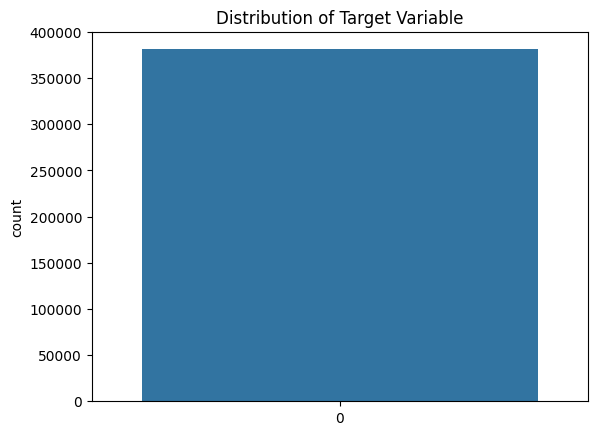

In [12]:
sns.countplot(df.Response)
plt.title('Distribution of Target Variable')
plt.show()

### Visualize the relationship between the target variable and age using a boxplot

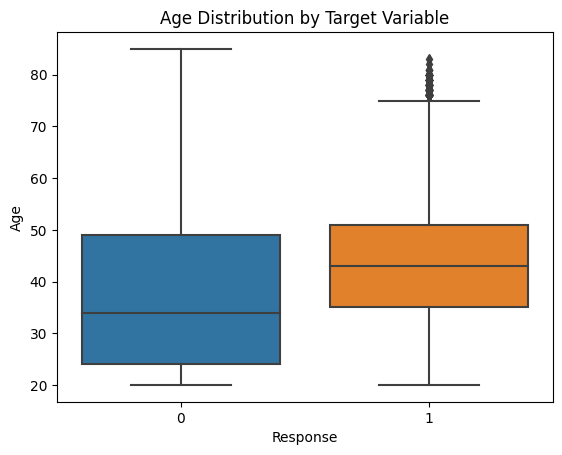

In [13]:
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Target Variable')
plt.show()

### Visualize the relationship between the target variable and annual premium using a boxplot

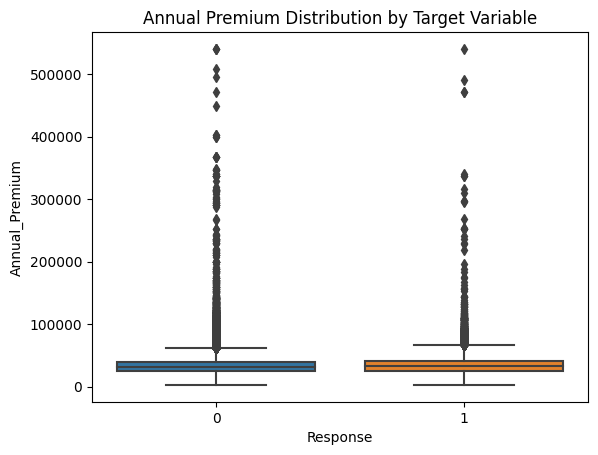

In [14]:
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Target Variable')
plt.show()

### Visualize the relationship between the target variable and gender using a countplot

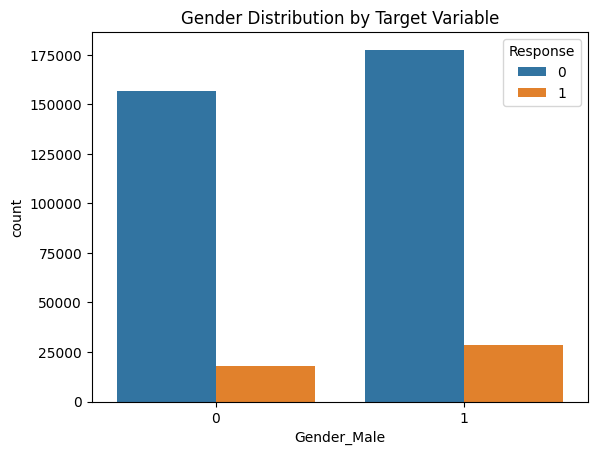

In [15]:
sns.countplot(x='Gender_Male', hue='Response', data=df)
plt.title('Gender Distribution by Target Variable')
plt.show()

### Save Cleaned dataset into Local

In [16]:
df.to_csv('../data/New/Health Insurance Cross Sell Prediction/Health Insurance Cross Sell Prediction/train_cleaned.csv')

## STEP5. Feature selection

In this step, we'll select the most important features for our model

### Feature selection

In [17]:
X = df.drop(['Response'], axis=1)
y = df.Response

### Feature scaling

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## STEP6. Train/Validation/Test split

### In this step, we'll split the dataset into three parts: training set, validation set, and test set.

In [19]:
# Train-validation-test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

## Step 7: Model selection and training

Selected model : LogisticRegression

In [20]:
# Train a logistic regression model for a fixed number of epochs and store the best model
num_epochs = 5
best_val_acc = 0.0
for epoch in range(num_epochs):
    # Fit the logistic regression model on the training data
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # Compute the training accuracy
    y_train_pred = lr.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Compute the validation accuracy
    y_val_pred = lr.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # Print the training and validation accuracy for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}: Train acc = {train_acc:.3f}, Val acc = {val_acc:.3f}")
    
    # Check if the current model has a better validation accuracy than the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr
        
print(f"\nBest validation accuracy: {best_val_acc:.3f}")

Epoch 1/5: Train acc = 0.878, Val acc = 0.877
Epoch 2/5: Train acc = 0.878, Val acc = 0.877
Epoch 3/5: Train acc = 0.878, Val acc = 0.877
Epoch 4/5: Train acc = 0.878, Val acc = 0.877
Epoch 5/5: Train acc = 0.878, Val acc = 0.877

Best validation accuracy: 0.877


If we don't use a fixed number of epochs in Step 7, the model will be trained until some stopping criterion is met, such as convergence of the optimization algorithm or reaching a maximum number of iterations. In this case, we won't be able to monitor the training process in the same way as when using a fixed number of epochs.

However, some machine learning libraries and functions may use a default maximum number of iterations or a convergence criterion that works well for many datasets. Therefore, if use a library or function that doesn't require specifying a fixed number of epochs, it may still work well on dataset without using epochs.

That being said, monitoring the training process, either by using a fixed number of epochs or by monitoring the convergence of the optimization algorithm. This can help identify potential issues with the model or the dataset, such as overfitting or underfitting, and allow to make adjustments to improve the model's performance.

## STEP8. Model evaluation

In this step, we'll evaluate the trained model on the test set and visualize the results using a confusion matrix.

### Model evaluation on test set

In [21]:
y_pred_test = lr.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.875


### Confusion matrix

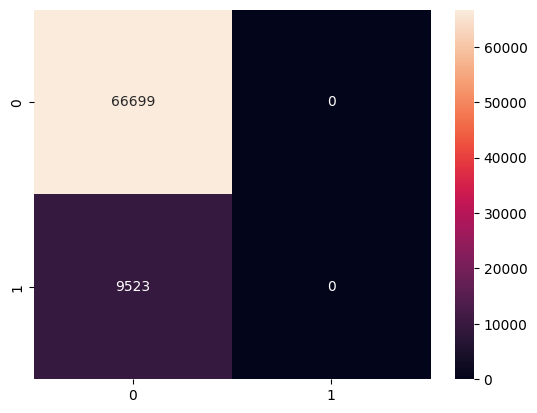

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## STEP9. Saving the trained model

In this step, we'll save the trained model using pickle

In [23]:
filename = 'health_insurance_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

### STEP10. Integrate model into a Django web application.

Integrating the model into a Django web application

1. Create a Django app
2. Create a view function to handle requests
3. Load the saved model using pickle
4. Preprocess the incoming data using the same preprocessing steps used during training
5. Make predictions using the trained model
6. Return the predictions to the user